In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from scipy.optimize import minimize

In [316]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

X  = scale(np.array(df.drop(['class','bare_nuclei'],1)))
y2 = (np.array(df['class'])/2)-1
y2 = y2.reshape((y2.shape[0],1))

X_train, X_test, y_train, y_test = train_test_split(X,y2,test_size = .20,random_state = 42)

c:\users\harpreet singh\appdata\local\programs\python\python36-64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [317]:
def initialize_parameters(n_x):
    """
    Argument:
    n_x -- size of the input
    
    Returns:
    parameters -- python dictionary containing your parameters:

    T --  theta array of shape (n_x+1,1)
    """
    np.random.seed(1)
    T = np.random.randn(n_x,1)*0.01
    
    return T

In [318]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

In [319]:
def cost(X, y, theta):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X,theta))
    
    return (1 / m) * (-np.log(y_pred).T.dot(y) - np.log(1 - y_pred).T.dot(1 - y))

In [320]:
def update_weights(X, y, theta,lr):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X,theta))
    
    gradient = (np.dot(X.T,  y_pred - y)/m)*lr
    theta = theta - gradient
    
    return theta


In [321]:
def train(X, y, theta, lr, iters):

    loss = np.zeros(iters)
    for i in range(iters):
        theta = update_weights(X, y, theta, lr)
        
        #Calculate error for auditing purposes
        loss[i] = cost(X,y,theta)

    return theta, loss

[[0.22876725]
 [0.22871539]
 [0.23570254]
 [0.188081  ]
 [0.20497924]
 [0.20553446]
 [0.21722141]
 [0.10846444]]


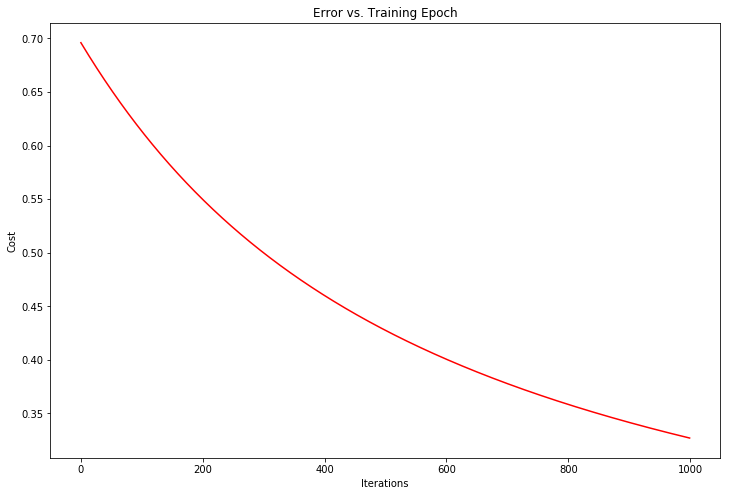

In [322]:
parameters = initialize_parameters(X_train.shape[1])
iterations = 1000
learning_rate = 0.001

parameters, loss =  train(X_train, y_train,parameters,learning_rate, iterations)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iterations), loss, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

print(parameters)
#Scikit learn
#Coefficients: [[0.31242254 0.10996486 0.44464014 0.18344483 0.04387358 0.31652595 0.1017104  0.13944887]]
#Intercept: [-6.1653044]

In [323]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(np.dot(X,theta)) >= threshold

    return(p.astype('int'))

In [324]:
def accuracy(predicted_labels, actual_labels):

    diff = predicted_labels - actual_labels

    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [325]:
classifications = predict(parameters, X_test, threshold=0.5)

our_acc = accuracy(classifications,y_test)
print('Our score: ',our_acc)


Our score:  0.9642857142857143


In [326]:
#Reference
#https://beckernick.github.io/logistic-regression-from-scratch/